In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("netflix_titles.csv")
df=pd.DataFrame(data)
df1=df.drop(['show_id'],axis=1)

<AxesSubplot:>

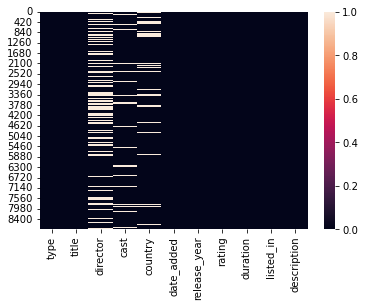

In [3]:
sns.heatmap(df1.isnull())

In [4]:
#replacing the missing value with mode
df1['director'] = df1['director'].fillna(df1['director'].mode()[0])
df1['cast'] = df1['cast'].fillna(df1['cast'].mode()[0])
df1['country'] = df1['country'].fillna(df1['country'].mode()[0])
df1['date_added'] = df1['date_added'].fillna(df1['date_added'].mode()[0])
df1['director'] = df1['director'].fillna(df1['director'].mode()[0])
df1['rating'] = df1['rating'].fillna(df1['rating'].mode()[0])
df1['duration'] = df1['duration'].fillna(df1['duration'].mode()[0])

<AxesSubplot:>

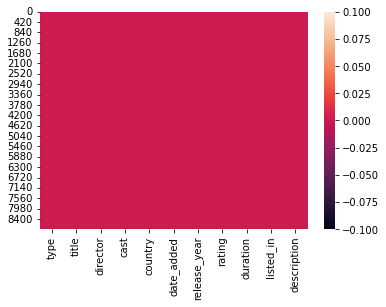

In [5]:
sns.heatmap(df1.isnull())

### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()

In [7]:
df1['type']=lbl_encode.fit_transform(df1['type'])
df1['title']=lbl_encode.fit_transform(df1['title'])
df1['director']=lbl_encode.fit_transform(df1['director'])
df1['cast']=lbl_encode.fit_transform(df1['cast'])
df1['country']=lbl_encode.fit_transform(df1['country'])
df1['date_added']=lbl_encode.fit_transform(df1['date_added'])
df1['release_year']=lbl_encode.fit_transform(df1['release_year'])
df1['rating']=lbl_encode.fit_transform(df1['rating'])
df1['duration']=lbl_encode.fit_transform(df1['duration'])
df1['listed_in']=lbl_encode.fit_transform(df1['listed_in'])
df1['description']=lbl_encode.fit_transform(df1['description'])

In [8]:
df1.to_csv("machinecode.csv")

### Feature Selection 

In [9]:
x=df1.drop(['type'],axis=1)
y=df1['type']

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

### Picking the top five important attributes

<AxesSubplot:>

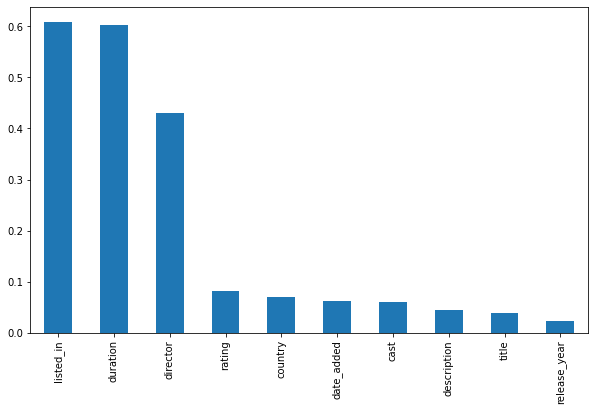

In [11]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info=pd.Series(mutual_info)
mutual_info.index=xtrain.columns
s=mutual_info.sort_values(ascending=False)
s.plot.bar(figsize=(10,6))

### SelectKBest

In [12]:
from sklearn.feature_selection import SelectKBest
top_five_cols=SelectKBest(mutual_info_classif,k=5)
top_five_cols.fit(xtrain.fillna(0),ytrain)
xtrain.columns[top_five_cols.get_support()]

Index(['director', 'country', 'rating', 'duration', 'listed_in'], dtype='object')

In [13]:
x1=df1.drop(['type','title','cast','date_added','release_year','description'],axis=1)
y1=df1['type']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)

## Machine Learning Algorithm
1. Logistic Regression.
2. Decision Tree Classifier.
3. Random Forest Classifier.

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)

LogisticRegression()

In [16]:
result=logr.predict(x_test)
result

array([1, 0, 1, ..., 0, 1, 0])

In [17]:
score = logr.score(x_test,y_test)*100
print(score)

82.06583427922814


In [18]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,result)

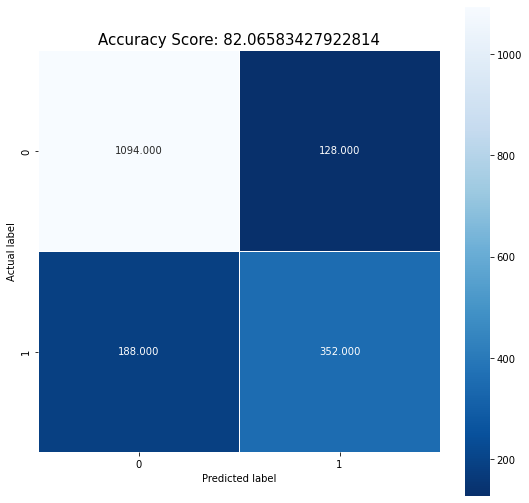

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

### Decision Tree Classifier

In [20]:
from sklearn import tree

In [21]:
train_features, test_features, train_targets, test_targets = train_test_split(x1,y1, test_size=0.2, random_state=123)

In [22]:
decision_tree = tree.DecisionTreeClassifier(random_state=456)
decision_tree = decision_tree.fit(train_features, train_targets)

In [23]:
class_names = ['TV Show','Movie']
feature_names=['director','country','rating','duration','listed_in']

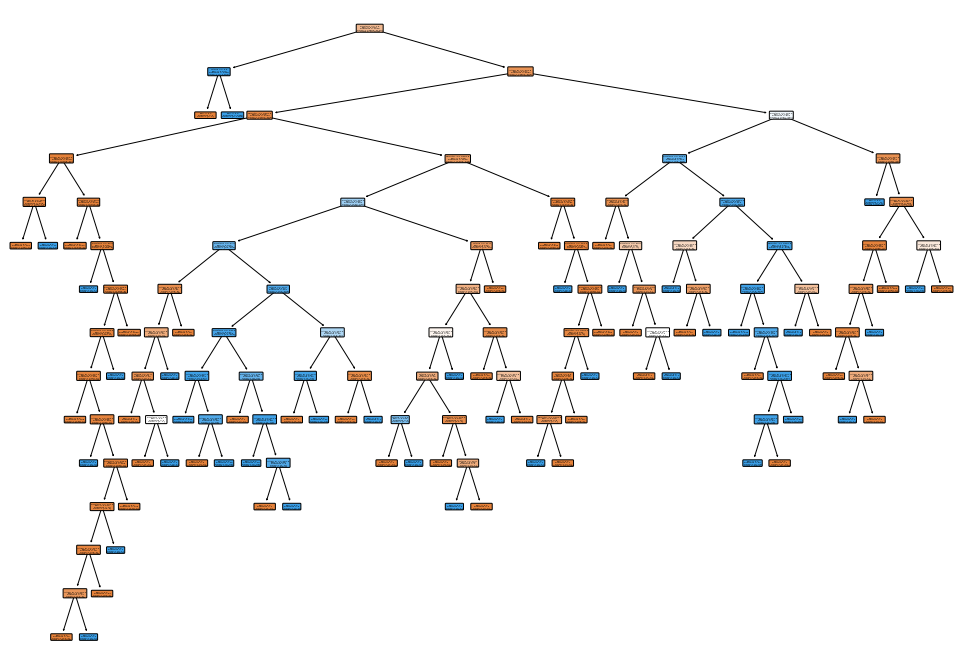

In [24]:
plt.subplots(figsize=(17, 12))
tree.plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)
plt.savefig("decision_tree.png")

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x1,y1)
labels_test = clf.predict(test_features)

In [27]:
labels_test

array([1, 0, 0, ..., 0, 0, 0])

In [28]:
acc = accuracy_score(labels_test,test_targets)*100
print("Accuracy of Decision Tree Classifier is:",acc)

Accuracy of Decision Tree Classifier is: 100.0


In [29]:
from sklearn import metrics
cm1 = metrics.confusion_matrix(test_targets,labels_test)

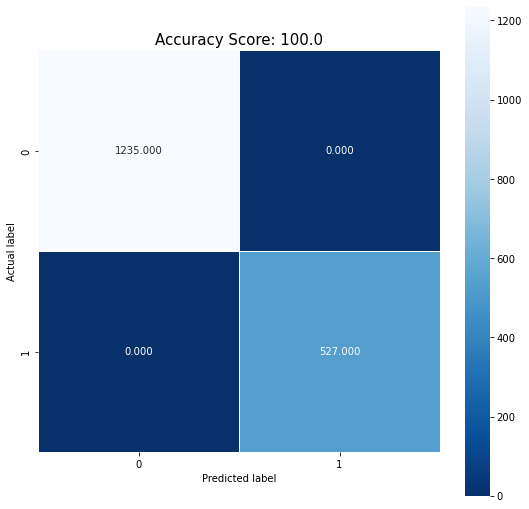

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)
plt.show()

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [32]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
acc1=round(accuracy_score(y_test,pred)*100,2)
print("Accuracy of Random Forest Classifier is: ",acc1)

Accuracy of Random Forest Classifier is:  97.79


In [33]:
from sklearn import metrics
cm2 = metrics.confusion_matrix(y_test,pred)
cm2

array([[1200,   22],
       [  17,  523]], dtype=int64)

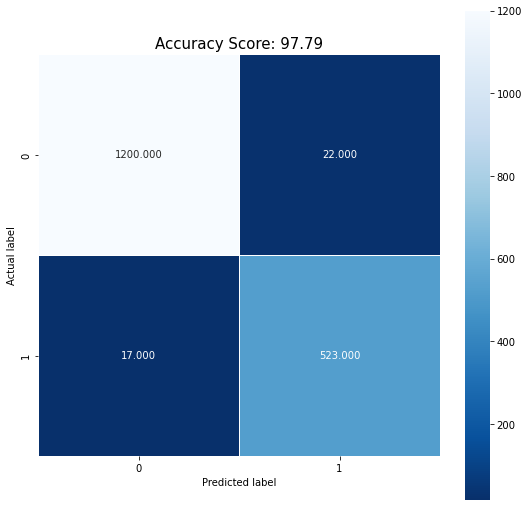

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc1)
plt.title(all_sample_title, size = 15)
plt.show()

In [35]:
# pickling the model
import pickle
pickle_out = open("class.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()